# ML 101

## NMF

This is a very strong algorithm which many applications. For example, it can be applied for Recommender Systems, for Collaborative Filtering for topic modelling and for dimensionality reduction.

The logic for Dimensionality Reduction is to take our $m \times n$ data and to decompose it into two matrices of $m \times features$ and $features \times n$ respectively. The $features$ will be the reduced dimensions.

### Dimensionality Reduction in Eurovision Data

####Load and Reshape the Data

In our dataset, the rows will be referred to the Countries that voted and the columns will be the countries that have been voted. The values will refer to the televote ranking.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
 
eurovision = pd.read_csv('https://media.githubusercontent.com/media/mariolpantunes/ml101/main/datasets/eurovision-2016.csv')
televote_Rank = eurovision.pivot(index='From country', columns='To country', values='Televote Rank')
# fill NAs by min per country
televote_Rank.fillna(televote_Rank.min(), inplace=True)
televote_Rank.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,Georgia,Germany,Hungary,Israel,Italy,Latvia,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,9.0,1.0,13.0,19.0,14.0,3.0,20.0,12.0,22.0,11.0,25.0,15.0,10.0,17.0,2.0,21.0,7.0,16.0,6.0,4.0,26.0,23.0,8.0,24.0,5.0,18.0
Armenia,1.0,12.0,7.0,25.0,17.0,15.0,22.0,5.0,18.0,4.0,3.0,19.0,8.0,24.0,14.0,16.0,21.0,6.0,10.0,1.0,23.0,13.0,9.0,11.0,2.0,20.0
Australia,12.0,1.0,8.0,22.0,1.0,2.0,18.0,13.0,25.0,4.0,24.0,21.0,19.0,14.0,23.0,11.0,10.0,5.0,15.0,6.0,17.0,9.0,20.0,16.0,3.0,7.0
Austria,12.0,8.0,2.0,24.0,14.0,6.0,19.0,16.0,23.0,10.0,21.0,9.0,11.0,17.0,13.0,18.0,20.0,25.0,1.0,3.0,7.0,15.0,4.0,5.0,2.0,22.0
Azerbaijan,25.0,9.0,11.0,2.0,16.0,3.0,21.0,17.0,20.0,7.0,10.0,22.0,4.0,5.0,13.0,14.0,18.0,6.0,8.0,1.0,24.0,15.0,12.0,19.0,2.0,23.0


In [2]:
televote_Rank.shape

(42, 26)

#### Non-Negative Matrix Factorization

Since we have the data in the right form, we are ready to run the NNMF algorithm. We will choose two components because our goal is to reduce the dimensions into 2.

In [3]:
# Import NMF
from sklearn.decomposition import NMF
 
# Create an NMF instance: model
model = NMF(n_components=2)
 
# Fit the model to televote_Rank
model.fit(televote_Rank)
 
# Transform the televote_Rank: nmf_features
nmf_features = model.transform(televote_Rank)
 
# Print the NMF features
print(nmf_features.shape)
 
print(model.components_.shape)

(42, 2)
(2, 26)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


As we can see we created two matrices of (42,2) and (2,26) dimensions respectively. Our two dimensions are the (42,2) matrix.

#### Plot the 42 Countries in two Dimensions

Let’s see how the scatter plot of the 42 countries into two dimensions.

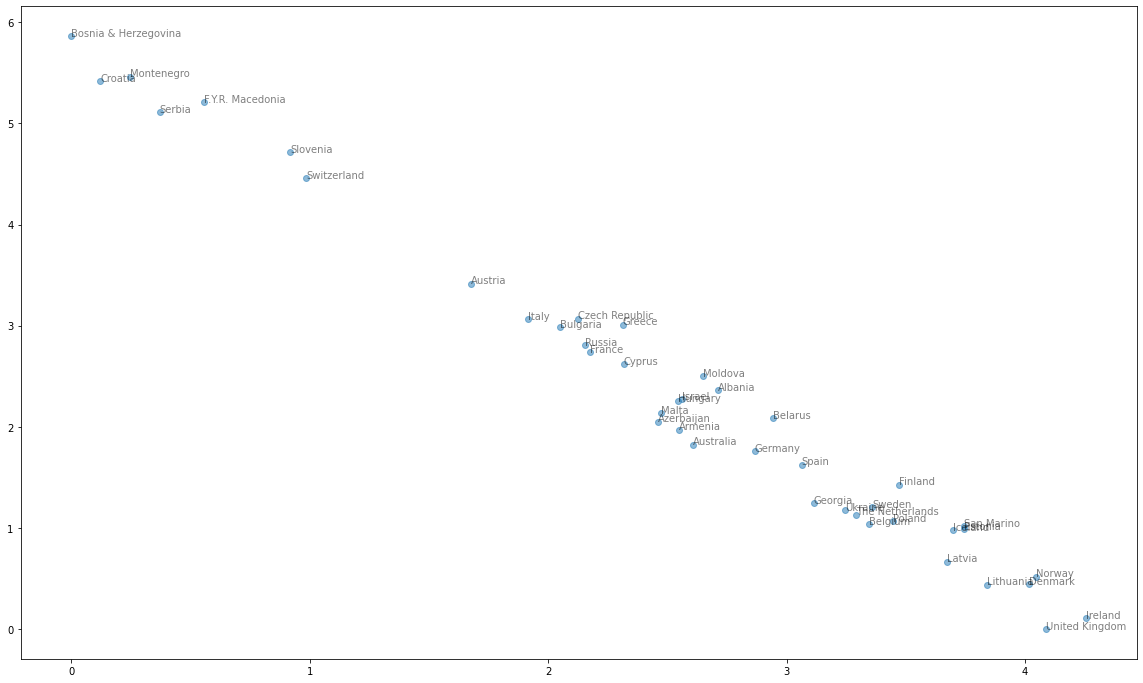

In [4]:
plt.figure(figsize=(20,12))
countries = np.array(televote_Rank.index)
xs = nmf_features[:,0]
 
# Select the 1th feature: ys
ys = nmf_features[:,1]
 
# Scatter plot
plt.scatter(xs, ys, alpha=0.5)
 
# Annotate the points
for x, y, countries in zip(xs, ys, countries):
    plt.annotate(countries, (x, y), fontsize=10, alpha=0.5)
plt.show()

### Can you see a pattern?

The 2D graph here is somehow consistent with the dendrogram that we got by applying the linkage distance. Again, we can see a “cluster” of the cluster from “Yugoslavia” and also that the Baltic countries are close as well as the Scandinavian and the countries of the United Kingdom.